In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4



In [2]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14, 14))
sc.settings.figdir = "fig6"

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['dpi'] = 300
plt.style.use('seaborn-white')

/tmp/ipykernel_17002/2188358848.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [21]:
"""

cd /nfs/team298/ls34/new_disease_atlas/
bsub -G team298 -q gpu-lotfollahi -n1 -M 250000 -gpu "num=1"  -o ./EXTERNAL_LOG.%J.bsub.out -e ./EXTERNAL_LOG.%J.bsub.err -R"select[mem>250000] rusage[mem=250000]" bash /nfs/users/nfs_l/ls34/fibroblast_atlas/1_Map_FETAL.sh

"""

'\n\ncd /nfs/team298/ls34/new_disease_atlas/\nbsub -G team298 -q gpu-lotfollahi -n1 -M 250000 -gpu "num=1"  -o ./EXTERNAL_LOG.%J.bsub.out -e ./EXTERNAL_LOG.%J.bsub.err -R"select[mem>250000] rusage[mem=250000]" bash /nfs/users/nfs_l/ls34/fibroblast_atlas/1_Map_FETAL.sh\n\n'

In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [22]:
# RENAME = {"CCL19+ fibroblast": "COLEC11+C7+ fibroblast"}
# adata.obs["test13"]=adata.obs["test13"].map(RENAME).fillna(adata.obs["test13"])

# COLEC11_FBS = ['SPP1', 'CAV1', 'ANGPTL2','COLEC11', "CXCL12", "C7"] 
# sc.pl.dotplot(adata_fetal, COLEC11_FBS, 'test13', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='Reds')

# above prepares h5ad to map to adult fibroblasts

# below looks at data post-integration

In [ ]:
sc.settings.figdir = "fig8"

In [24]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(15,15))


In [26]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_fetal_and_adult_fbs.h5ad'
adata=sc.read_h5ad(PATH)



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

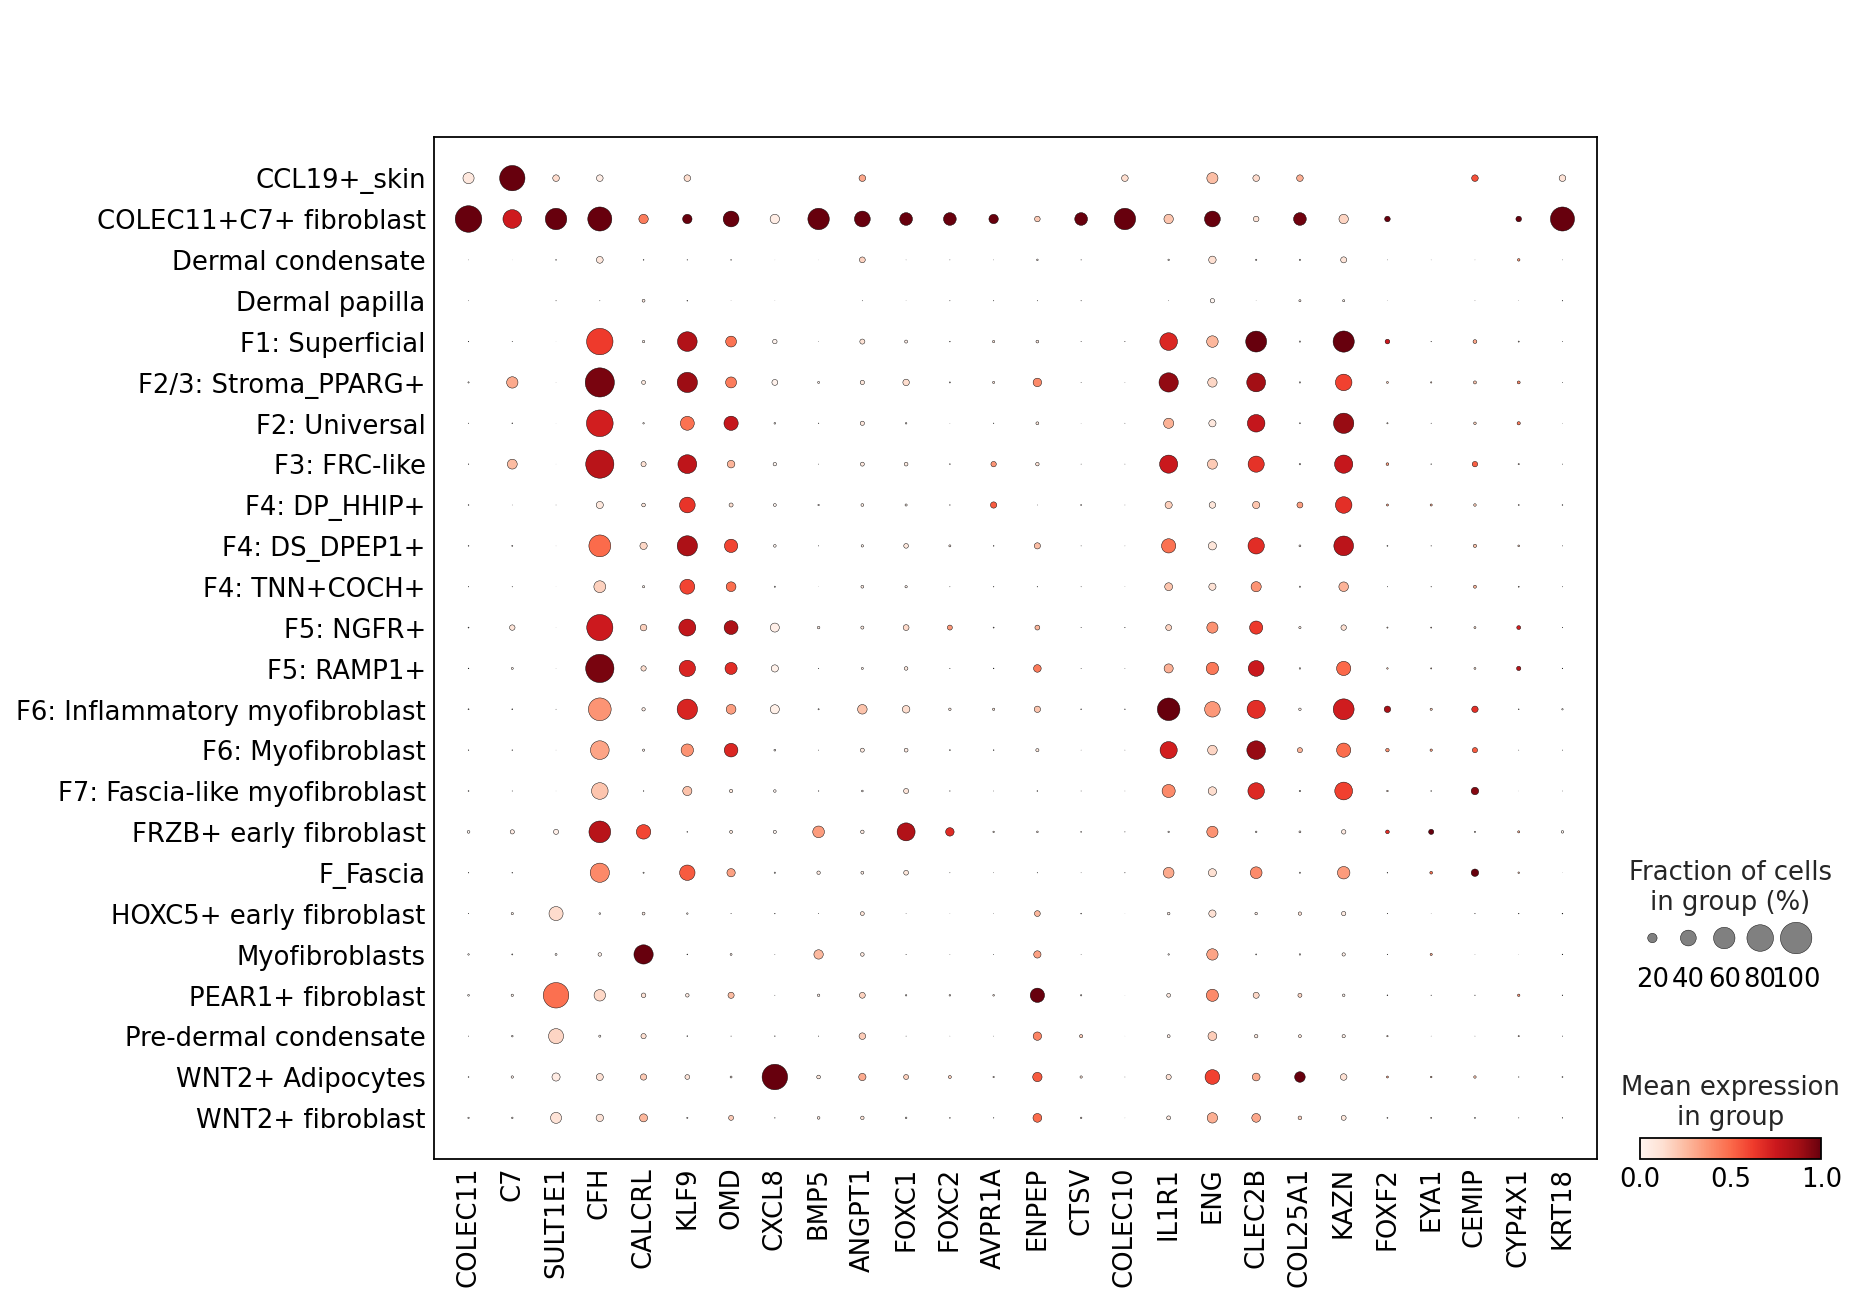

In [27]:
COLEC_GENES = ["COLEC11", "C7", "SULT1E1", "CFH", "CALCRL", "KLF9", "OMD", "CXCL8", "BMP5", "ANGPT1", "FOXC1","FOXC2", "AVPR1A", 
 "ENPEP",  "CTSV", "COLEC10", "IL1R1", "ENG", "CLEC2B", "COL25A1", "KAZN", "FOXF2", "EYA1", "CEMIP", "CYP4X1", "KRT18"]

sc.pl.dotplot(
    adata,
    COLEC_GENES,
    groupby="test13",
    standard_scale="var",
    dendrogram=False,
)

In [28]:

# adata=sc.read_h5ad(PATH + 'adata_all_scvi5.h5ad.countsonly')
# adata

In [29]:
adata=adata[adata.obs["test13"]!="ePericytes"]
adata=adata[adata.obs["test13"]!="Adipocytes"]


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


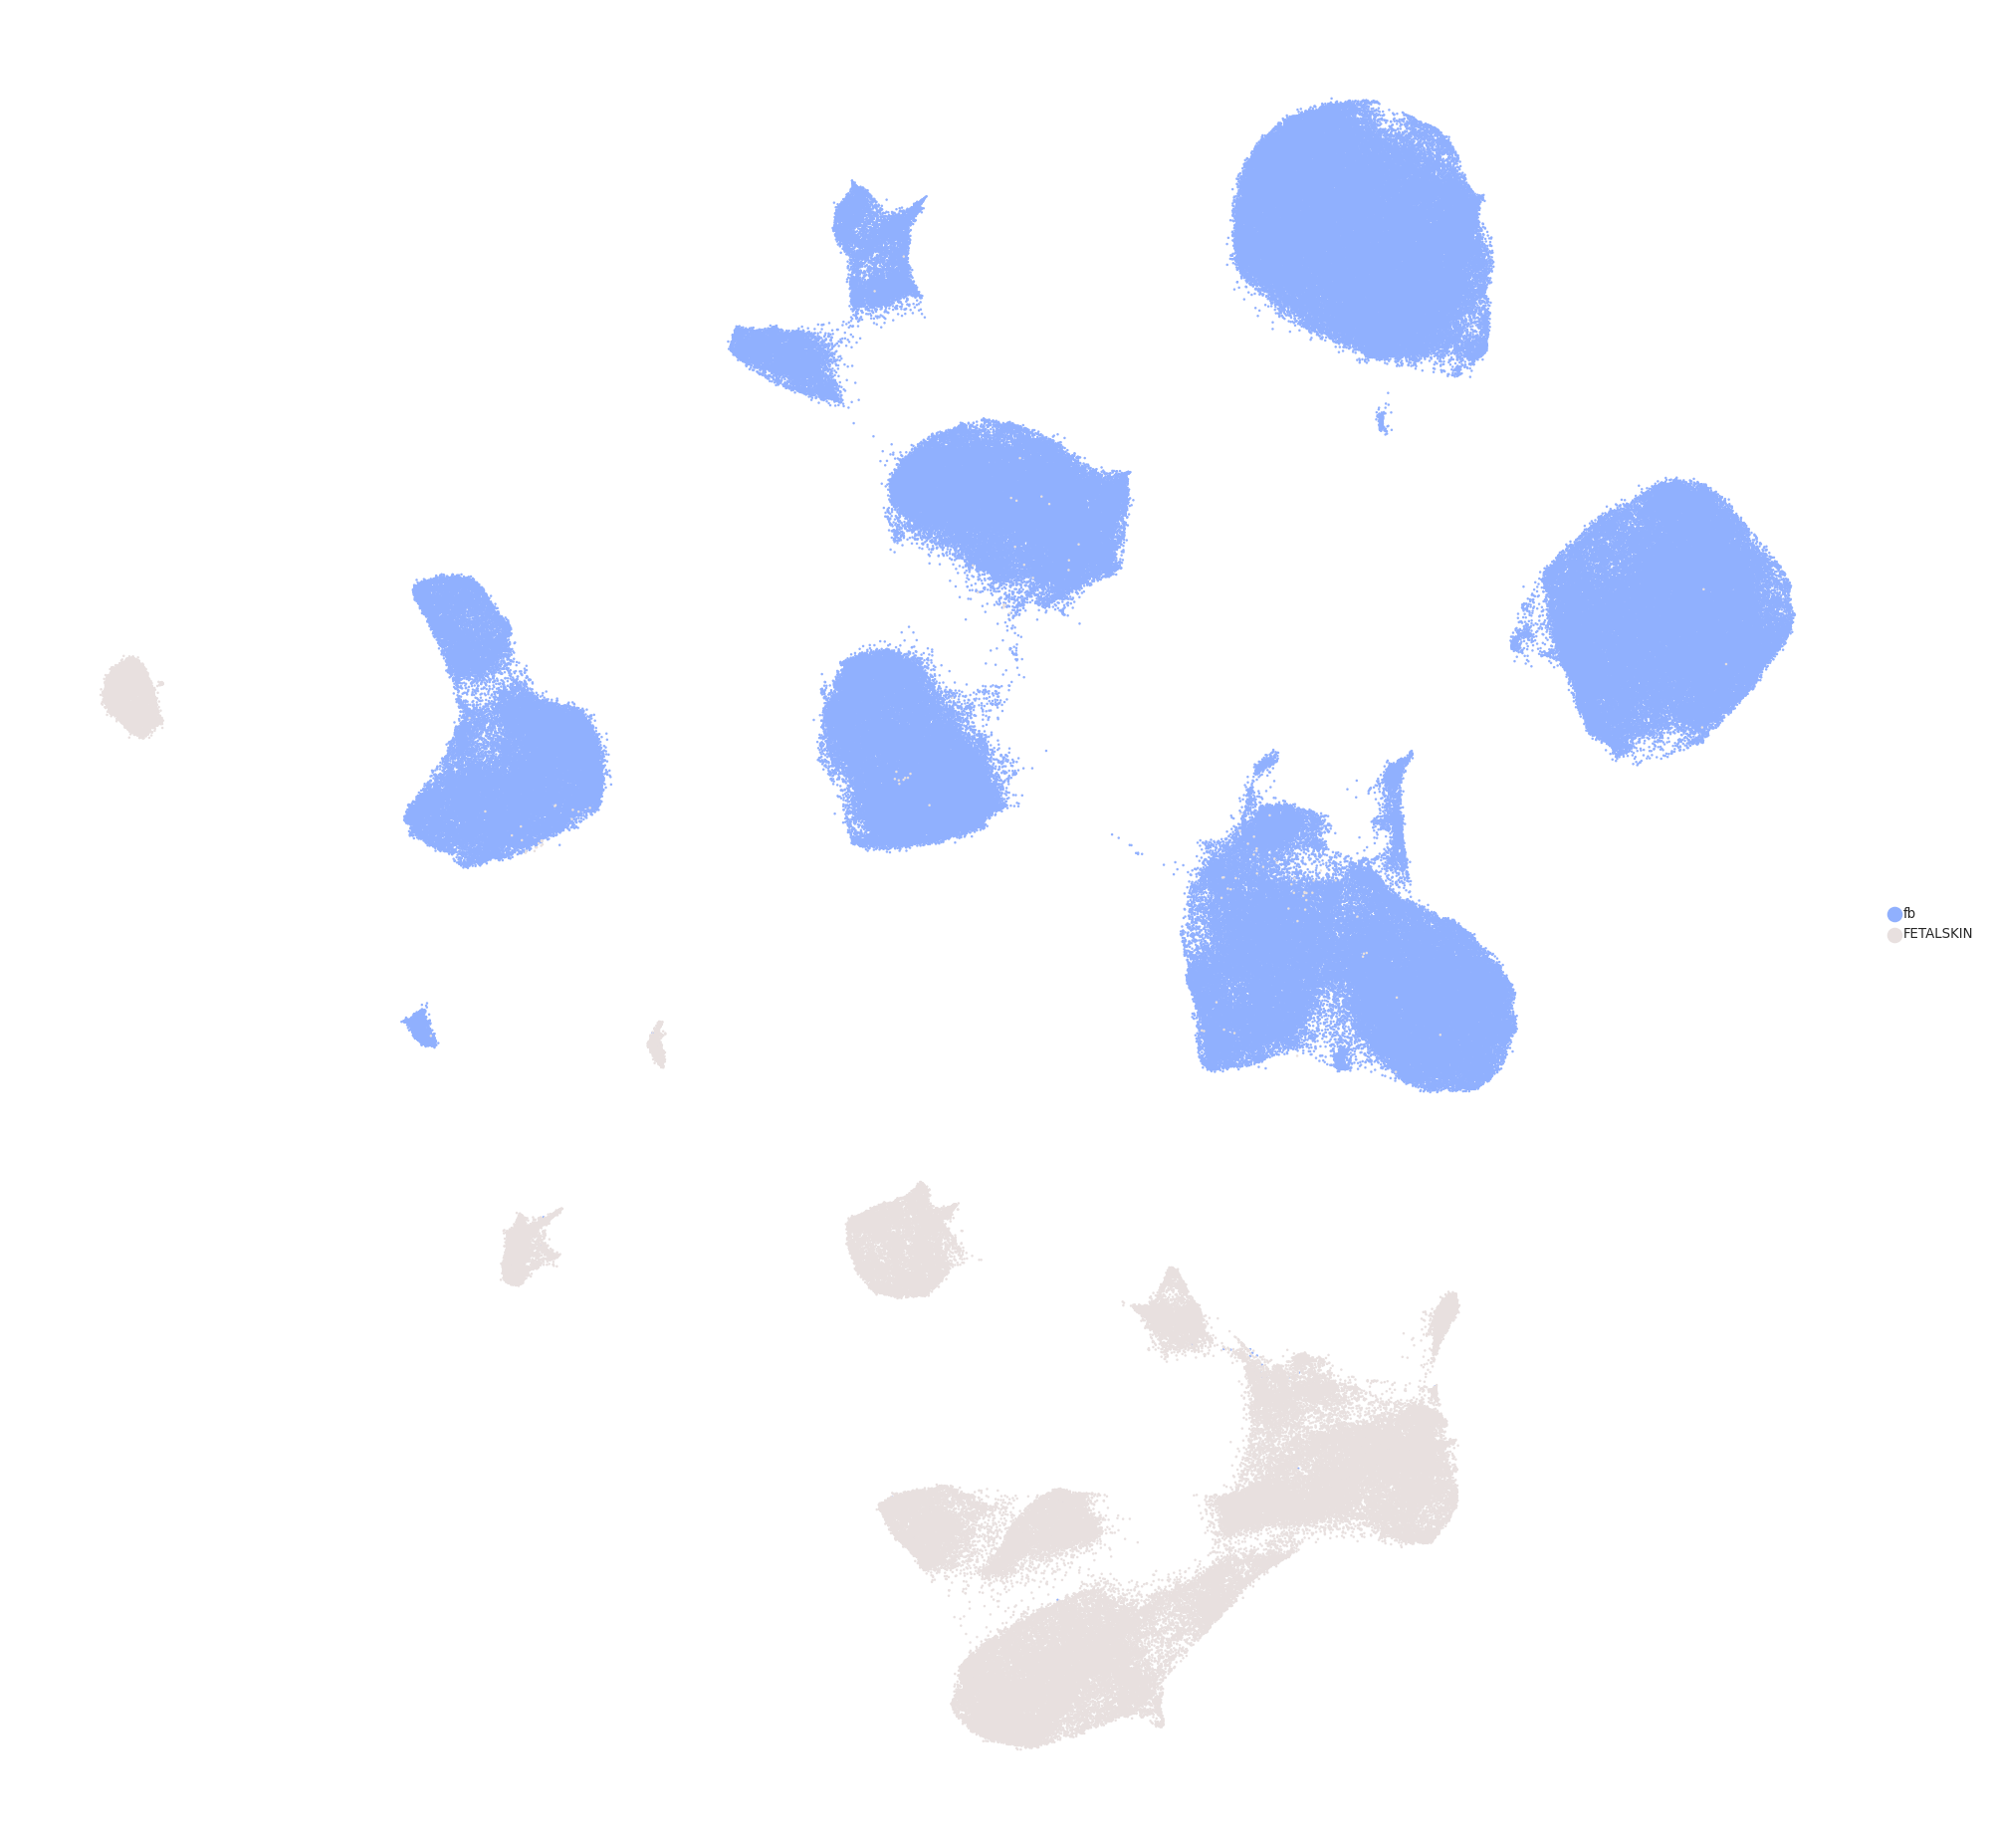

In [30]:
sc.pl.umap(adata, 
           color = ["Mapping_status2"],
          #legend_loc="on data",
          legend_fontsize=6,vmax=10,title='',
          s=5,
           palette = [  "#90B0FE",
        
          "#E8E0DF",],
           save="8a_umap_fetal_vs_adult.pdf"
          )
           


In [31]:
adata.obs.test13.value_counts()

test13
F2: Universal                     73838
F1: Superficial                   65619
F2/3: Stroma_PPARG+               42620
F3: FRC-like                      40842
F7: Fascia-like myofibroblast     38485
F4: DS_DPEP1+                     31018
HOXC5+ early fibroblast           30573
WNT2+ fibroblast                  29414
F6: Myofibroblast                 26254
Pre-dermal condensate             13855
FRZB+ early fibroblast            10524
F5: NGFR+                          9260
F4: TNN+COCH+                      8560
F5: RAMP1+                         6881
F6: Inflammatory myofibroblast     6049
Dermal papilla                     5743
PEAR1+ fibroblast                  4884
Dermal condensate                  4626
F_Fascia                           2977
Myofibroblasts                     2537
F4: DP_HHIP+                       1940
WNT2+ Adipocytes                   1622
COLEC11+C7+ fibroblast               10
CCL19+_skin                           8
Name: count, dtype: int64

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to

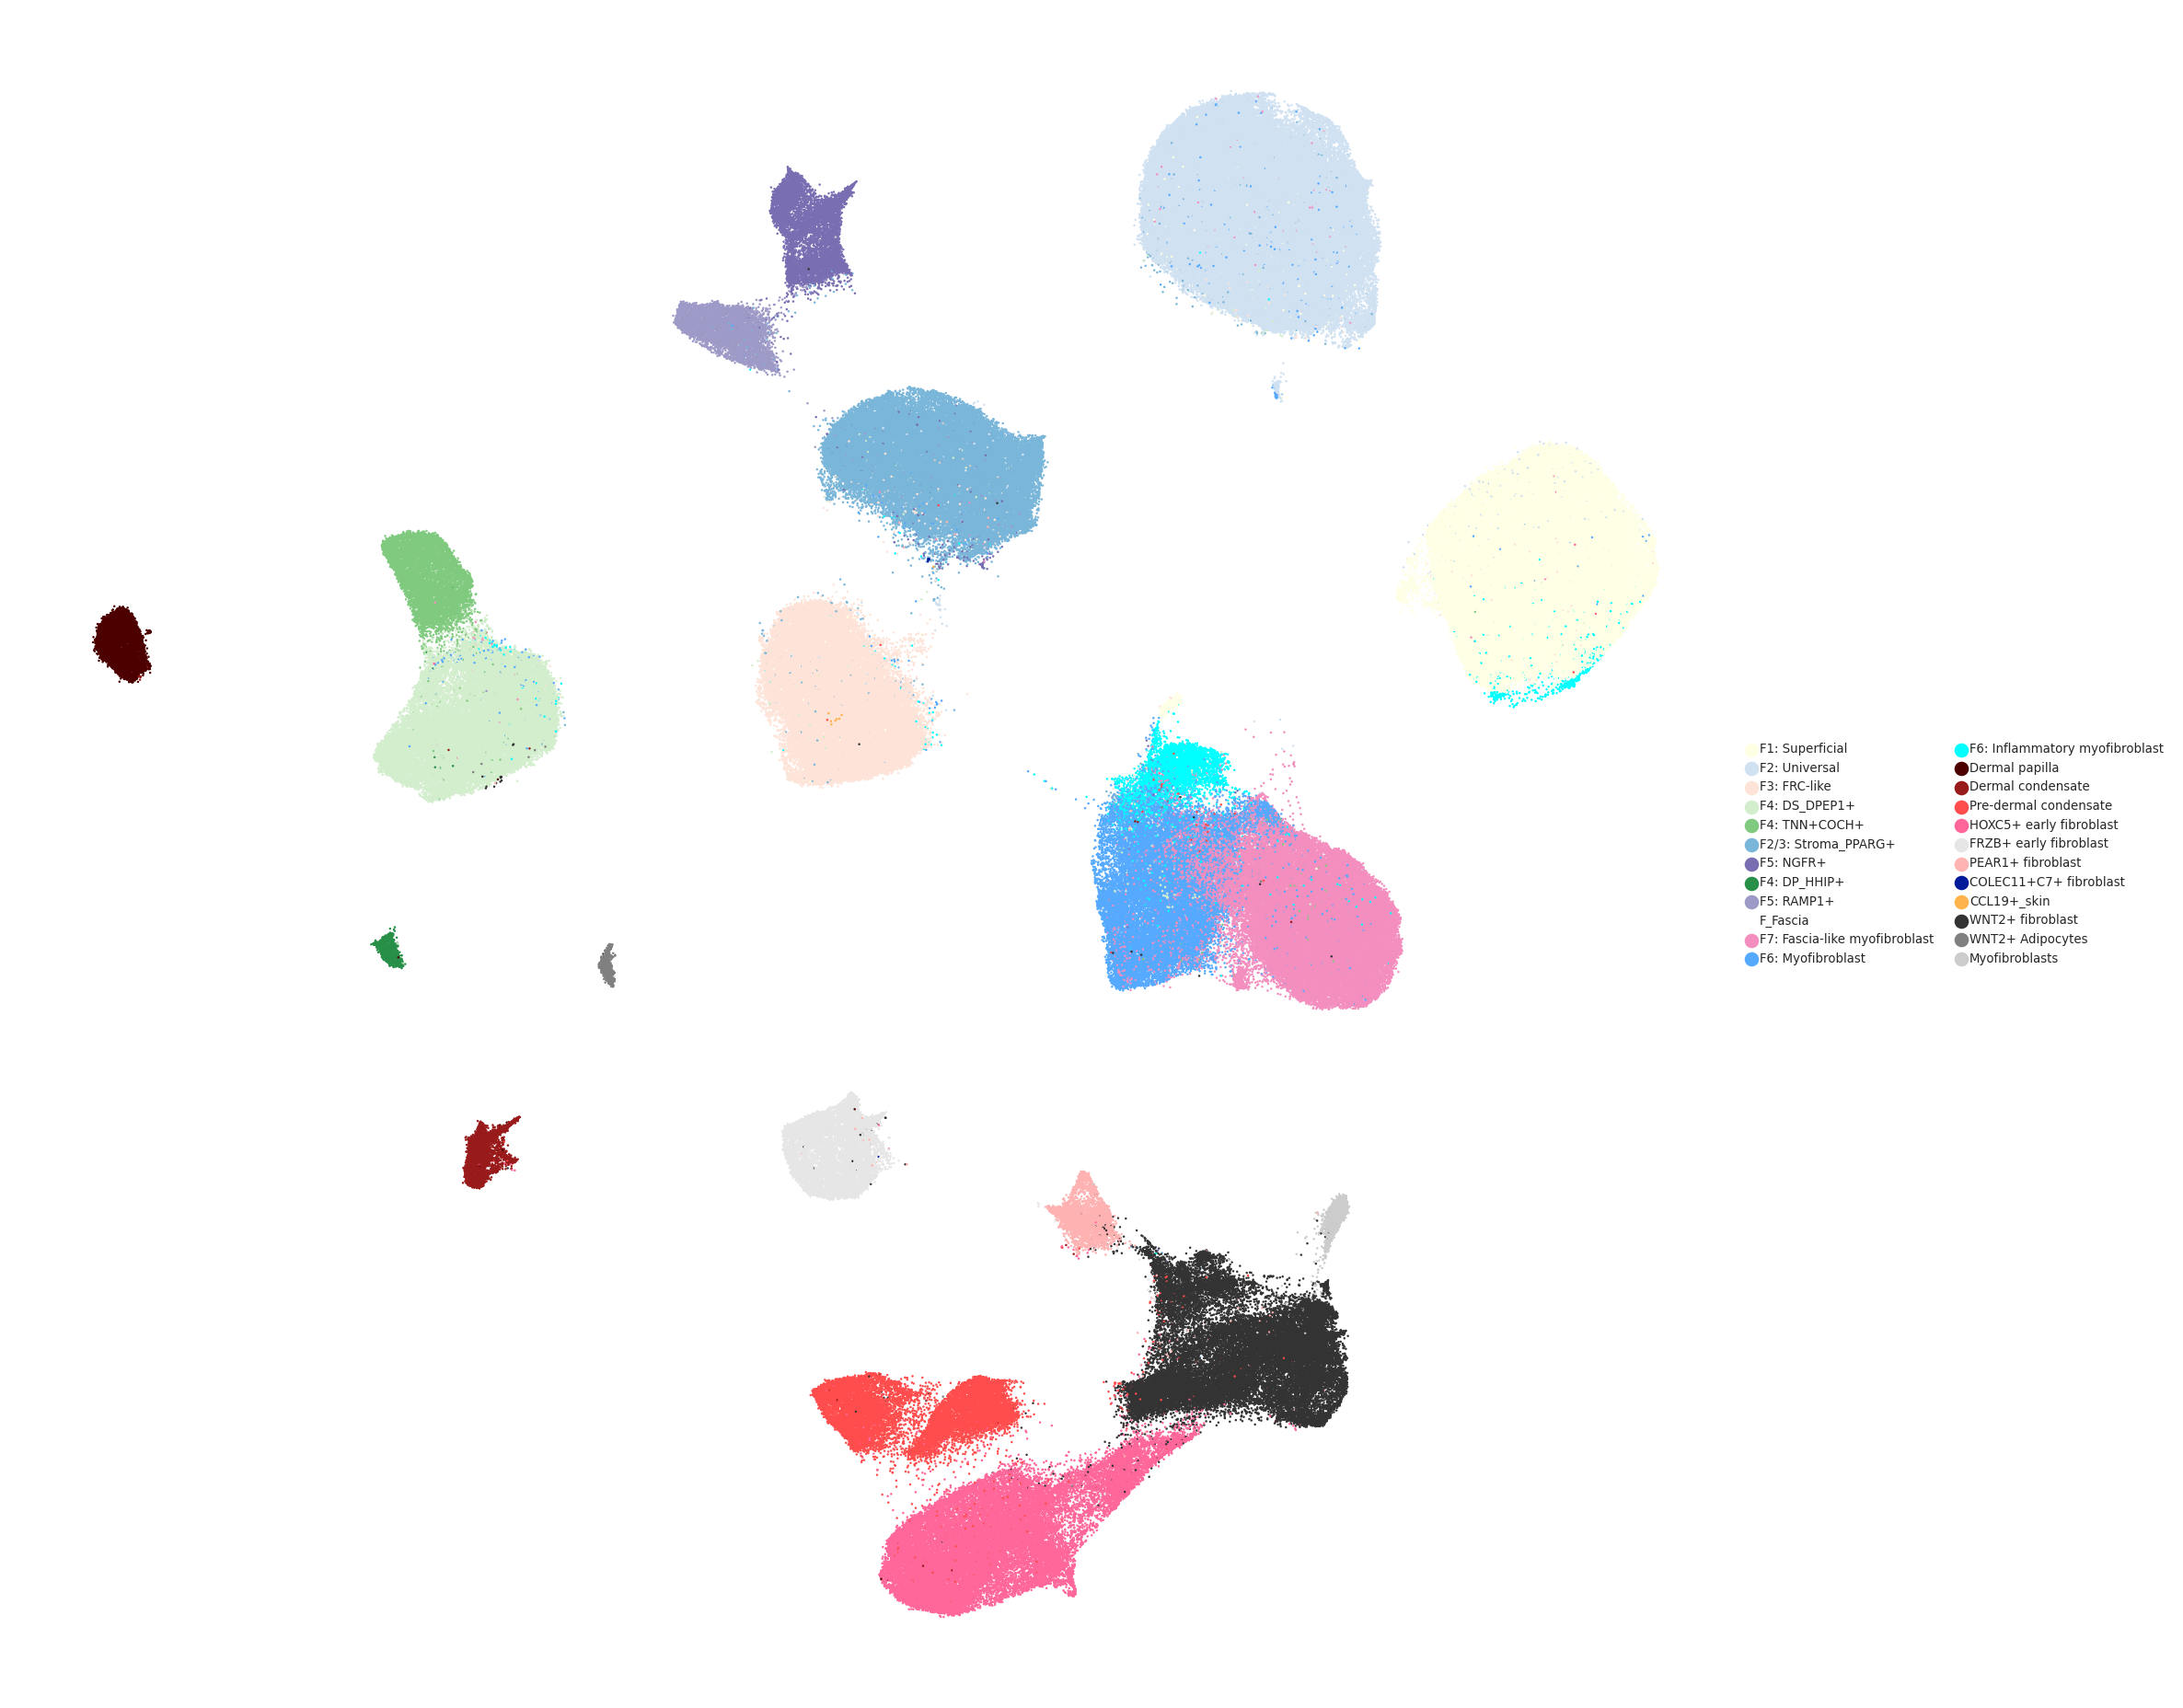

In [32]:
COLORS = {
    'F1: Superficial': np.array([1.0, 1.0, 0.898, 1.0]),
    'F2: Universal': np.array([0.814, 0.884, 0.950, 1.0]),
    'F3: FRC-like': np.array([0.997, 0.896, 0.849, 1.0]),
    'F4: DS_DPEP1+': np.array([0.827, 0.933, 0.803, 1.0]),
    'F4: TNN+COCH+': np.array([0.502, 0.791, 0.501, 1.0]),
    'F2/3: Stroma_PPARG+': np.array([0.473, 0.712, 0.851, 1.0]),
    'F5: NGFR+': np.array([0.473, 0.433, 0.699, 1.0]),
    'F4: DP_HHIP+': np.array([0.153, 0.562, 0.283, 1.0]),
    'F5: RAMP1+': np.array([0.618, 0.602, 0.783, 1.0]),
    'F_Fascia': np.array([0.0, 0.0, 0.0, 0.0]),
    'F7: Fascia-like myofibroblast': np.array([0.957, 0.557, 0.745, 1.0]),
    'F6: Myofibroblast': np.array([0.333, 0.667, 1.0, 1.0]),
    'F6: Inflammatory myofibroblast': np.array([0.0, 1.0, 1.0, 1.0]),

    # More distinct shades of Red
'Dermal papilla': np.array([0.3, 0.0, 0.0, 1.0]),  # Darkest Red  
'Dermal condensate': np.array([0.6, 0.1, 0.1, 1.0]),  # Darker Crimson
    'Pre-dermal condensate': np.array([1.0, 0.3, 0.3, 1.0]),  # Bright Red

    # More distinct shades of Pink
    'HOXC5+ early fibroblast': np.array([1.0, 0.4, 0.6, 1.0]),  # Hot Pink
'FRZB+ early fibroblast': np.array([0.9, 0.9, 0.9, 1.0]),  # Very Light Grey
    # More distinct shades of Orange
'PEAR1+ fibroblast': np.array([1.0, 0.7, 0.7, 1.0]),  # Very Light Red
'COLEC11+C7+ fibroblast': np.array([0.0, 0.1, 0.6, 1.0]),  # Dark Electric Blue
    'CCL19+_skin': np.array([1.0, 0.7, 0.3, 1.0]),  # Pale Orange

    # More distinct shades of Grey
    'WNT2+ fibroblast': np.array([0.2, 0.2, 0.2, 1.0]),  # Almost Black
    'WNT2+ Adipocytes': np.array([0.5, 0.5, 0.5, 1.0]),  # Medium Grey
    'Myofibroblasts': np.array([0.8, 0.8, 0.8, 1.0]),  # Light Grey
}

# Ensure the test13 column is categorical and order it according to COLORS dict
adata.obs["test13"] = pd.Categorical(adata.obs["test13"], categories=COLORS.keys(), ordered=True)

# Assign colors to adata.uns based on the reordered categories
adata.uns["test13_colors"] = [COLORS[cat] for cat in adata.obs["test13"].cat.categories]

# Plot UMAP with the custom colors and legend order
# sc.pl.umap(
#     adata, 
#     color=["test13"], 
#     legend_loc="on data",
#     legend_fontsize=6,
#     legend_fontoutline=2,
#     s=5,
#     title=''
# )

sc.pl.umap(
    adata, 
    color=["test13"], 
    legend_fontsize=6,
    legend_fontoutline=2,
    s=5,
    title='',
    save="8a_prenatal_umap_celltypes.pdf"
)
# sc.pl.umap(
#     adata, 
#     color=["test13"], 
#     legend_fontsize=6,
#     legend_fontoutline=2,
#     s=1,
#     title='',
#     legend_loc=None
# )

In [34]:
# #adata_subset.layers["counts"] = adata_subset.X
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)

In [35]:
# adata = adata[:, ~adata.var_names.str.startswith("RP")].copy()


# adata = adata[:, ~adata.var_names.str.startswith("MT-")].copy()
# # groupby = "Mapping_status2"
# # sc.tl.rank_genes_groups(adata, groupby, method='t-test', key_added="de_leiden");
# # df2 = pd.DataFrame(adata.uns['de_leiden']['names'])
# # df2.head(1)

# # select_population = list(df2.columns)[0]


# # genes0_adult = df2[select_population][:50]


# # select_population = list(df2.columns)[1]


# # genes0 = df2[select_population][:50]



# # RENAME = {'fb': "Adult",
# #           'FETALSKIN': "Prenatal"}
# # adata.obs[groupby] = adata.obs[groupby].map(RENAME)
# # adata.obs[groupby].value_counts()
# # GENES_DEGS = {"Adult": genes0_adult[:],
# #              "Prenatal": genes0[:]}

# # import pickle

# # file_path = "/nfs/team298/ls34/new_disease_atlas/fetal_fb_dict.pkl"

# # with open(file_path, "wb") as file:
# #     pickle.dump(GENES_DEGS, file)


 

In [ ]:
sc.settings.figdir = "sfig10"

In [36]:
import pickle

file_path = "/nfs/team298/ls34/new_disease_atlas/fetal_fb_dict.pkl"

# Load the dictionary
with open(file_path, "rb") as file:
    GENES_DEGS = pickle.load(file)

print("Dictionary successfully loaded!")

Dictionary successfully loaded!


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


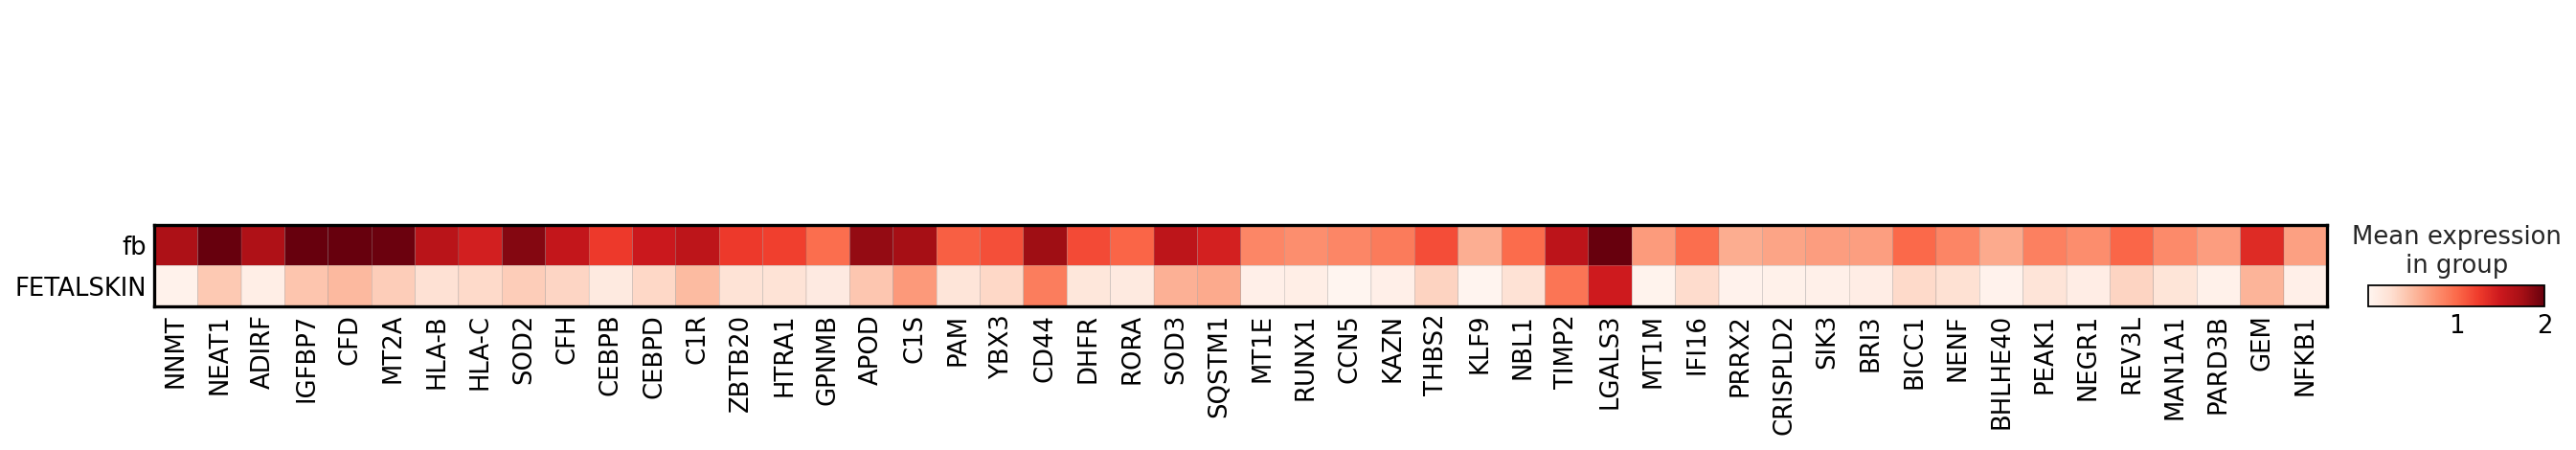

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


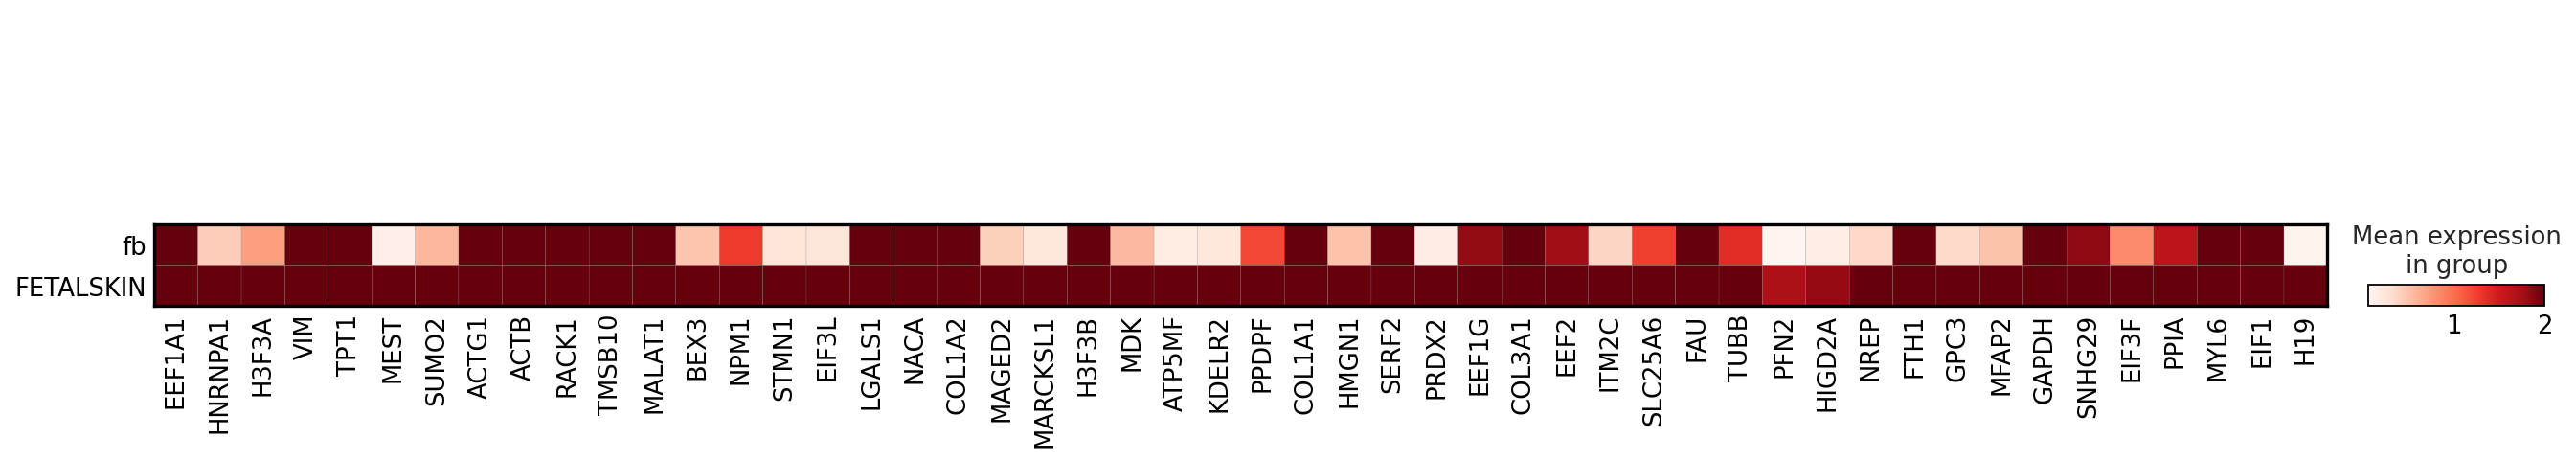

In [37]:
groupby = "Mapping_status2"
sc.pl.matrixplot(
    adata,
    GENES_DEGS["Adult"],
    groupby=groupby,
    #standard_scale="var",
    dendrogram=False,
    cmap="Reds", vmax=2,
    save="sfig10b_adult_degs.pdf"
)
sc.pl.matrixplot(
    adata,
     GENES_DEGS["Prenatal"],
    groupby=groupby,
    #standard_scale="var",
    dendrogram=False,
    cmap="Reds", vmax=2,
        save="sfig10b_prenatal_degs.pdf"

)



In [38]:
adata_f3only = adata[adata.obs["test13"].isin([ 'F3: FRC-like', 'CCL19+_skin' ])]
adata_f3only.obs["test13"].value_counts()

test13
F3: FRC-like    40842
CCL19+_skin         8
Name: count, dtype: int64

In [39]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_fetal.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_fetal.var_names]
    return LIST

In [40]:
adata_f3only.X[:5,:5].A

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.60110346, 0.        , 0.60110346, 0.        , 0.        ],
       [0.        , 0.        , 1.61943235, 0.        , 0.        ]])

In [41]:
# mapping_dict = adata_f3only.obs["test13"].to_dict()


In [42]:
# adata=sc.read_h5ad(PATH + 'adata.h5ad')
# adata.X[:5,:5].A

In [43]:
# adata.obs["test13"] = adata.obs.index.map(mapping_dict).fillna("Other")
# adata.obs["test13"].value_counts()

In [44]:
# adata = adata[adata.obs["test13"]!="Other"]
# adata.obs["test13"].value_counts()

In [45]:
# base_dir = '/nfs/team298/ls34/new_disease_atlas/'
# #MODEL = #'model_scanvi5_FETALSKIN_4494'v1
# MODEL = "model_scanvi5_FETALSKIN_4099"
# PATH = base_dir + MODEL + '/'

# adata.write(PATH + 'adata_fetal_adult_f3only.h5ad')

In [46]:
# PATH + 'adata_fetal_adult_f3only.h5ad'

In [47]:
#adata_fetal.layers["counts"] =adata_fetal.X.copy()
sc.pp.normalize_total(adata_f3only, target_sum=1e4)
sc.pp.log1p(adata_f3only)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [48]:
# #adata.uns['log1p']['base'] = None§a
# sc.tl.rank_genes_groups(adata_f3only, 'test13', method='t-test', key_added="de_leiden");
# import pandas as pd
# df2 = pd.DataFrame(adata_f3only.uns['de_leiden']['names'])
# df2.head(1)



In [49]:
# select_population =  list(df2.columns)[0]

# genes0 = df2[select_population][:50]
# genes1 = df2[select_population][50:100]
# genes2 = df2[select_population][100:150]
# genes3 = df2[select_population][150:200]
# genes4 = df2[select_population][200:250]
# genes5 = df2[select_population][250:300]
# genes6 = df2[select_population][300:350]
# genes7 = df2[select_population][350:400]
# genes8 = df2[select_population][400:450]
# genes9 = df2[select_population][450:500]
# genes10 = df2[select_population][500:550]
# genes11 = df2[select_population][550:600]
# genes12 = df2[select_population][600:650]
# genes13 = df2[select_population][650:700]
# genes14 = df2[select_population][700:750]
# genes15 = df2[select_population][750:800]
# genes16 = df2[select_population][800:850]
# genes17 = df2[select_population][850:900]
# genes18 = df2[select_population][900:950]
# genes19 = df2[select_population][950:1000]
# genes20 = df2[select_population][1000:1050]
# genes21 = df2[select_population][1050:1100]
# genes22 = df2[select_population][1100:1150]
# genes23 = df2[select_population][1150:1200]
# genes24 = df2[select_population][1200:1250]
# genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]

# groupby = "test13"
# sc.pl.dotplot(
#     adata_f3only,
#     genes5,
#     groupby=groupby,
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_f3only,
#     genes6,
#     groupby=groupby,
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_f3only,
#     genes7,
#     groupby=groupby,
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_f3only,
#     genes8,
#     groupby=groupby,
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_f3only,
#     genes9,
#     groupby=groupby,
#     standard_scale="var",
#     dendrogram=False,
# )

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

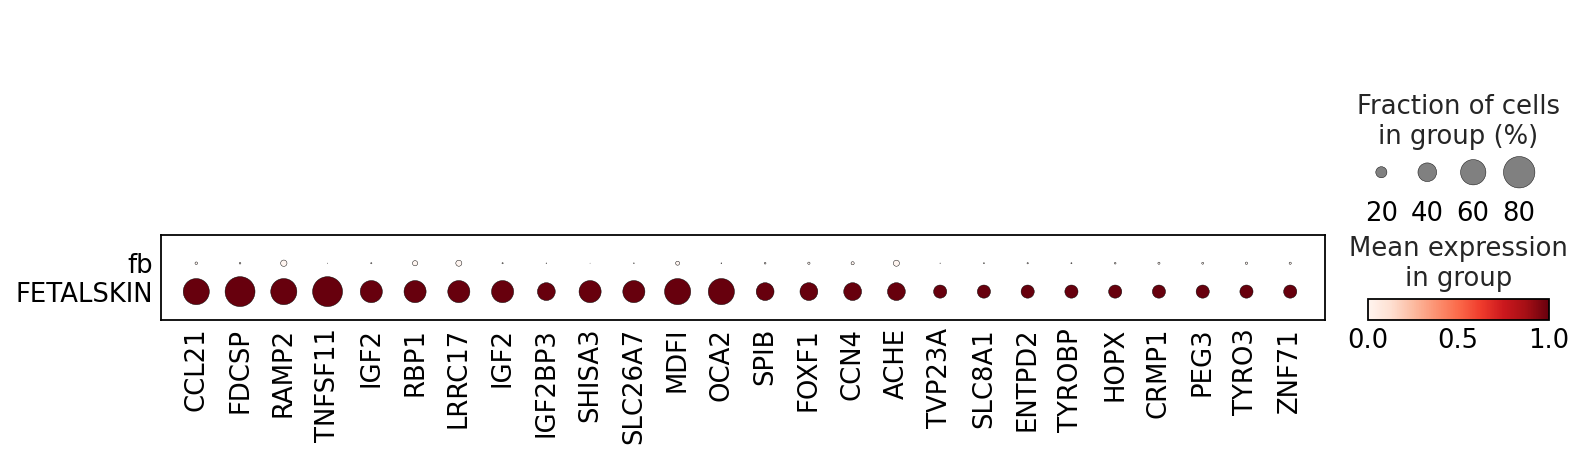

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


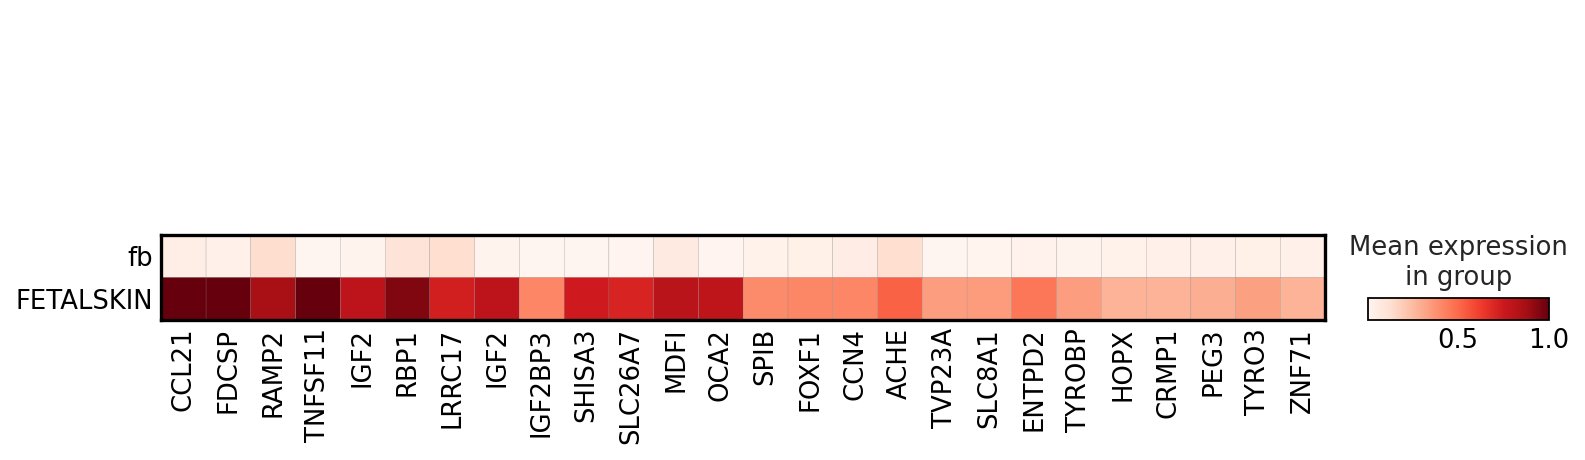

In [50]:
# GENES = ["CCL21", "FDCSP",  "RAMP2", "TNFSF11", "IGF2", "RBP1", "LRRC17", "IGF2", "IGF2BP3", "SHISA3", "SLC26A7", "MDFI", "OCA2", 
#         "SPIB", "FOXF1", "CCN4", "ACHE", "TVP23A", "SLC8A1", "ENTPD2", "TYROBP", "HOPX", "CRMP1", "PEG3", "TYRO3", "ZNF71"
#         ]
# sc.pl.dotplot(
#     adata_f3only,
#     GENES,
#     groupby=groupby,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.matrixplot(
#     adata_f3only,
#     GENES,
#     groupby=groupby,
#     vmax=1,
#    # standard_scale="var",
#     dendrogram=False,
#     cmap="Reds"
# )

In [53]:
adata_adult=adata[adata.obs.Mapping_status2!="FETALSKIN"].copy()
adata_adult.shape

(354343, 36591)

In [55]:
import gc

In [56]:
del(adata)
gc.collect()

32908


# fetal only

In [1]:
import scanpy as sc
# PATH = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_FETALSKIN_4494/adata_fetalonly.h5ad.countsonly'
# adata_fetal=sc.read_h5ad(PATH)
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_fetal_fbs.h5ad'
adata_fetal=sc.read_h5ad(PATH)
adata_fetal.X[:6,:6].A

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


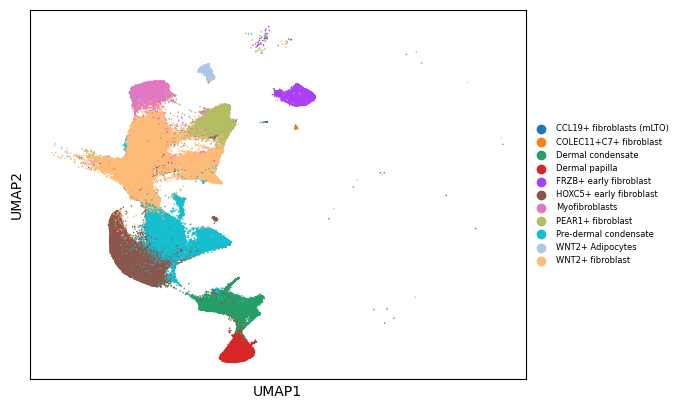

In [3]:
sc.pl.umap(
    adata_fetal, 
    color=["test13"], 
    legend_fontsize=6,
    legend_fontoutline=2,
    s=5,
    title='',
   # save="8a_prenatal_umap_celltypes.pdf"
)
# sc.pl.umap(
#     adata, 
#     color=["test13"], 

In [5]:
mapping_dict=adata_fetal.obs["test13"].to_dict()

In [6]:
import pickle

with open("fetal_annotations.pkl", "wb") as f:
    pickle.dump(mapping_dict, f)

In [4]:
adata_fetal.obs

,sample_id,dataset_id,Site_status,Patient_status,DonorID,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,test12,test13,Mapping_status2,leiden_res0.1
AACCATGAGGTGCTTT-1-4834STDY7002879,F16,prenatal,8.0,prenatal,F16,978,2110.0,0.0,0.000000,Myofibroblasts,Myofibroblasts,FETALSKIN,10
AACTTTCCACGAAGCA-1-4834STDY7002879,F16,prenatal,8.0,prenatal,F16,5214,25838.0,649.0,2.511804,WNT2+ fibroblast,WNT2+ fibroblast,FETALSKIN,0
AAGGTTCGTGTAACGG-1-4834STDY7002879,F16,prenatal,8.0,prenatal,F16,5135,30303.0,652.0,2.151602,WNT2+ fibroblast,WNT2+ fibroblast,FETALSKIN,0
ACACCCTGTCGTTGTA-1-4834STDY7002879,F16,prenatal,8.0,prenatal,F16,4234,16567.0,353.0,2.130742,WNT2+ fibroblast,WNT2+ fibroblast,FETALSKIN,0
ACATACGTCGAATGCT-1-4834STDY7002879,F16,prenatal,8.0,prenatal,F16,4464,22687.0,517.0,2.278838,WNT2+ fibroblast,WNT2+ fibroblast,FETALSKIN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGCATGGC-1-HCA_rFSKI14539501,F221,prenatal,14.0,prenatal,F221,2576,7308.0,122.0,1.669403,Pre-dermal condensate,Pre-dermal condensate,FETALSKIN,3
TTTGTCATCTCCTATA-1-HCA_rFSKI14539501,F221,prenatal,14.0,prenatal,F221,1571,3428.0,77.0,2.246208,WNT2+ fibroblast,WNT2+ fibroblast,FETALSKIN,0
TTTGTCATCTGCAGTA-1-HCA_rFSKI14539501,F221,prenatal,14.0,prenatal,F221,2332,6515.0,134.0,2.056792,Pre-dermal condensate,Pre-dermal condensate,FETALSKIN,3
TTTGTCATCTTCATGT-1-HCA_rFSKI14539501,F221,prenatal,14.0,prenatal,F221,1556,3461.0,90.0,2.600405,Dermal papilla,Dermal papilla,FETALSKIN,8


In [62]:
#adata_subset.layers["counts"] = adata_subset.X
sc.pp.normalize_total(adata_fetal, target_sum=1e4)
sc.pp.log1p(adata_fetal)
#adata.layers["normalized"] = adata.X.copy()


In [63]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)
    
    pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)
    
NEW_LIST = {"F2": reynolds_short_final["F2: Universal"] ,
            
         
            "Myofibroblast":     LESIONAL_GENES_VSHORT5["F6+F7"] +  LESIONAL_GENES_VSHORT5["F6-F8"]  
           }

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

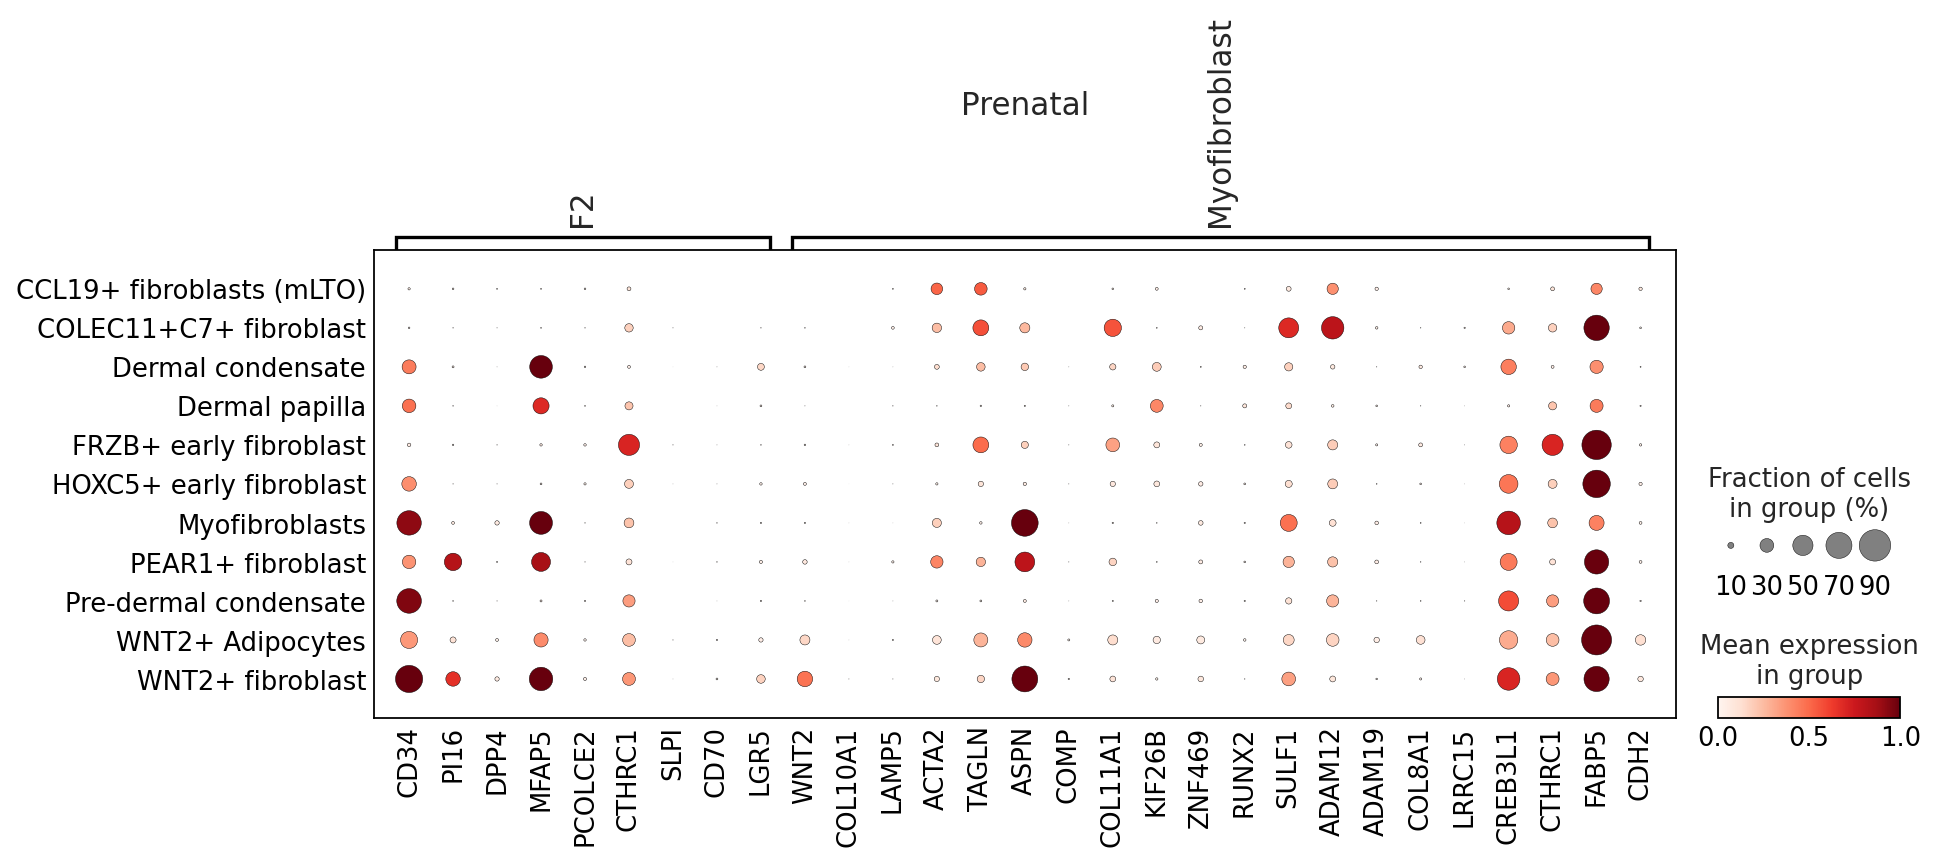

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

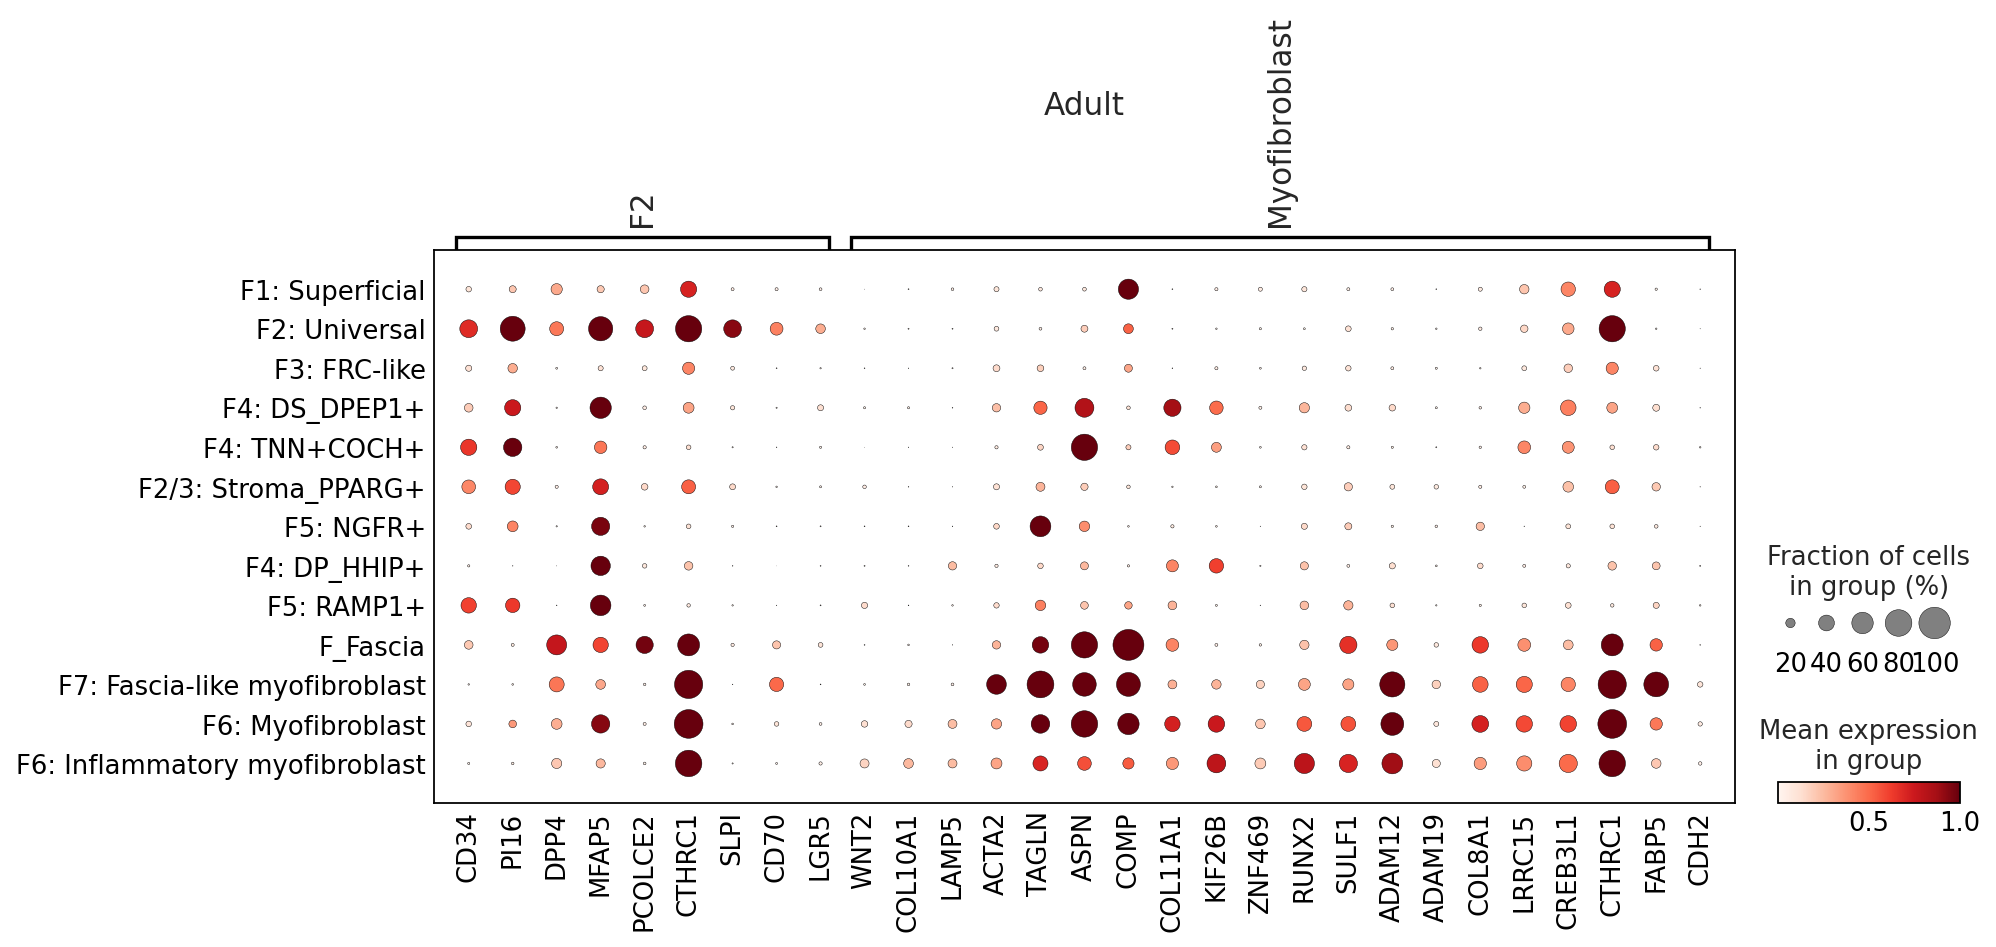

In [64]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_fetal.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_fetal.var_names]
    return LIST

sc.pl.dotplot(
    adata_fetal,
    remove_markers(NEW_LIST),
    groupby="test13",
    #standard_scale="var",
    dendrogram=False,
    vmax=1,
    title="Prenatal"
)

sc.pl.dotplot(
    adata_adult,
    remove_markers(NEW_LIST),
    groupby="test13",
    vmax=1,
    #standard_scale="var",
    dendrogram=False,
    title="Adult"
)

In [66]:
import pickle

# Define file path
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl'

# Load the object
with open(file_path, 'rb') as file:
    ALL_GENES_NOF8_PLUSDP = pickle.load(file)

print("Loaded successfully!")

Loaded successfully!


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

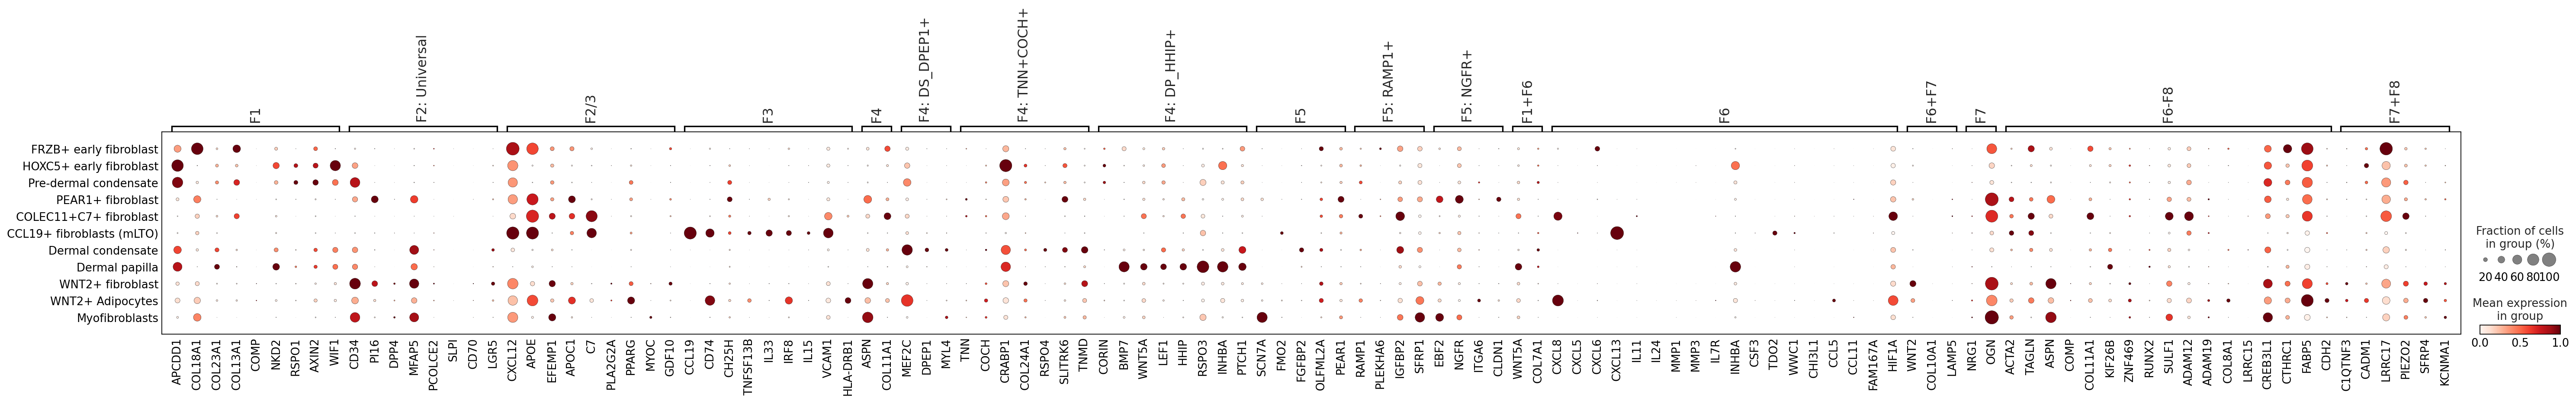

In [67]:
ORDER=[    'FRZB+ early fibroblast',
 'HOXC5+ early fibroblast',    'Pre-dermal condensate',  'PEAR1+ fibroblast',
       'COLEC11+C7+ fibroblast',
       # 'CCL19+_skin',
       'CCL19+ fibroblasts (mLTO)',
    
        'Dermal condensate', 'Dermal papilla',
        'WNT2+ fibroblast',  'WNT2+ Adipocytes',
      
 'Myofibroblasts']




sc.pl.dotplot(
        adata_fetal,
        remove_markers(ALL_GENES_NOF8_PLUSDP),
        groupby="test13",
        standard_scale="var",
        dendrogram=False,
            categories_order=ORDER,  
 #   save="fetal_dotplot.pdf"

    ) 


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

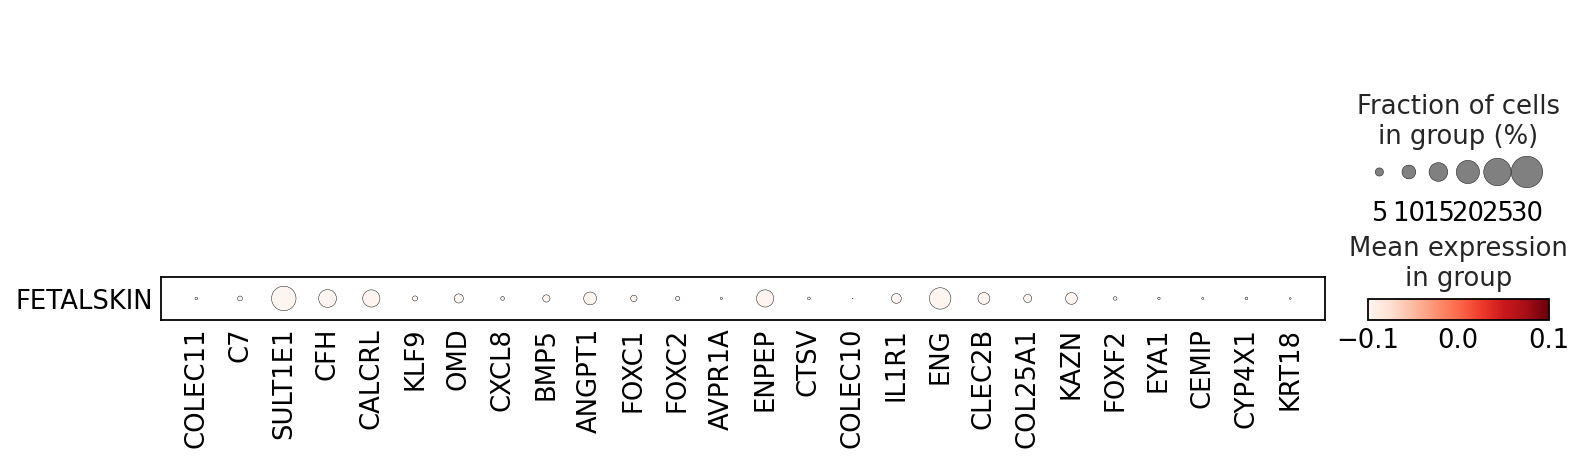

In [73]:
# COLEC_GENES = ["COLEC11", "C7", "SULT1E1", "CFH", "CALCRL", "KLF9", "OMD", "CXCL8", "BMP5", "ANGPT1", "FOXC1","FOXC2", "AVPR1A", 
#  "ENPEP",  "CTSV", "COLEC10", "IL1R1", "ENG", "CLEC2B", "COL25A1", "KAZN", "FOXF2", "EYA1", "CEMIP", "CYP4X1", "KRT18"]

# sc.pl.dotplot(
#     adata_fetal,
#     COLEC_GENES,
#     groupby=groupby,
#    # standard_scale="var",
#     dendrogram=False,
# )

In [77]:
import gc
try:
    del adata
except: 
    1
gc.collect()


81380

In [82]:
df2=pd.read_csv("degs_fbs.csv")

In [183]:
RENAME = {"CCL19+ fibroblasts (mLTO)": "CCL19+_skin"}
adata_fetal.obs['test13']=adata_fetal.obs['test13'].map(RENAME).fillna(adata_fetal.obs['test13'])
adata_fetal.obs.test13.value_counts()

test13
WNT2+ fibroblast           74299
HOXC5+ early fibroblast    34303
Pre-dermal condensate      34181
Dermal condensate          23190
PEAR1+ fibroblast          18671
Myofibroblasts             15286
Dermal papilla             13240
FRZB+ early fibroblast     11041
WNT2+ Adipocytes            3156
COLEC11+C7+ fibroblast       510
CCL19+_skin                  109
Name: count, dtype: int64

In [184]:
CONTROL_SIZE = 200 #default 50 (100 was good)
N_BINS=25 #default 25 (10 was good)
N = 50

adata_fetal = sc.tl.score_genes(adata_fetal, df2["F1: Superficial"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F1")

In [185]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F2: Universal"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F2")
gc.collect()

38500

In [186]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F2/3: Stroma_PPARG+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F2/3")
gc.collect()

497

In [187]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F3: FRC-like"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F3")
gc.collect()

497

In [188]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: DS_DPEP1+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: DS")
gc.collect()

497

In [189]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: TNN+COCH+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: TNN+COCH+")
gc.collect()

497

In [190]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: DP_HHIP+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: DP_HHIP+")
gc.collect()

497

In [191]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F5: RAMP1+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F5: RAMP1+")
gc.collect()

497

In [192]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F5: NGFR+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F5: NGFR+")
gc.collect()

497

In [193]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F6: Inflammatory myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F6")
gc.collect()

497

In [194]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F6: Myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F7")
gc.collect()


497

In [195]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F7: Fascia-like myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F8")
gc.collect()

497

In [196]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F_Fascia"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F_Fascia")

gc.collect()

495

In [197]:
fetal_fb_order=['Dermal papilla',
     'Dermal condensate',
 'Pre-dermal condensate',
     'HOXC5+ early fibroblast',
 'FRZB+ early fibroblast',
 'PEAR1+ fibroblast',
 'COLEC11+C7+ fibroblast', 'CCL19+_skin',



 'WNT2+ fibroblast',
 'WNT2+ Adipocytes',
'Myofibroblasts',]

In [198]:
list(adata_fetal.obs.test13.unique())

['Myofibroblasts',
 'WNT2+ fibroblast',
 'Pre-dermal condensate',
 'FRZB+ early fibroblast',
 'HOXC5+ early fibroblast',
 'WNT2+ Adipocytes',
 'PEAR1+ fibroblast',
 'COLEC11+C7+ fibroblast',
 'Dermal condensate',
 'CCL19+_skin',
 'Dermal papilla']

In [199]:
sc.settings.figdir = "fig8"

In [200]:
def plot_matrix(cluster_scores, cmap="viridis", normalisation=None, colorbar_ticks= [0, 0.5, 1], dataset_name= "Prenatal Fibroblasts",
               reorder_dict=None, reorder_list = None, savepath="genemodule_no_n_specified.pdf"):
    max_score = cluster_scores.max().max()
    figsize = (8, 8)
    if reorder_list:
        cluster_scores = cluster_scores.loc[reorder_list]
    if reorder_dict:
        cluster_scores.rename(columns=reorder_dict, inplace=True)
    if not normalisation:
        cluster_scores_normalized = cluster_scores  #/ max_score
    else:
        if normalisation == "max":
            cluster_scores_normalized = cluster_scores / max_score
        elif normalisation == "minmax":
            cluster_scores_normalized = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())
        elif normalisation == "row":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=0), axis=1)
        elif normalisation == "col":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=1), axis=0)
        else:
            print("Not valid normalisation method. ['max', 'minmax', 'row', 'col']")

    # Set the figure size before plotting
    plt.figure(figsize=figsize)  # Adjust as needed

    # Create the heatmap
    ax = sns.heatmap(
        cluster_scores_normalized.T,  # Transpose to get genes on y and clusters on x
        cmap=cmap,
        linewidths=0.0,
        linecolor=None,  # Add this
        square=True,  # Force square cells, sometimes fixes grid issues
        cbar_kws={"label": "Gene module score"},
        vmin=0  # Set the minimum value of the colorbar to 0
    )

    sns.despine()  # Removes spines, which may contribute to grid-like appearance
    cbar = ax.collections[0].colorbar
    #cbar.set_ticks(colorbar_ticks)
    #cbar.set_ticklabels(colorbar_ticks)

    # Add titles and labels as needed
    plt.title(normalisation)
    plt.xlabel(dataset_name)
    plt.ylabel('Adult Fibroblast Gene Modules')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.style.use("seaborn-white")  # Removes unnecessary background
    sns.set_style("white")
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'{savepath}', dpi=300, bbox_inches="tight", format="pdf")
    plt.show()


/tmp/ipykernel_17002/3877336463.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")  # Removes unnecessary background


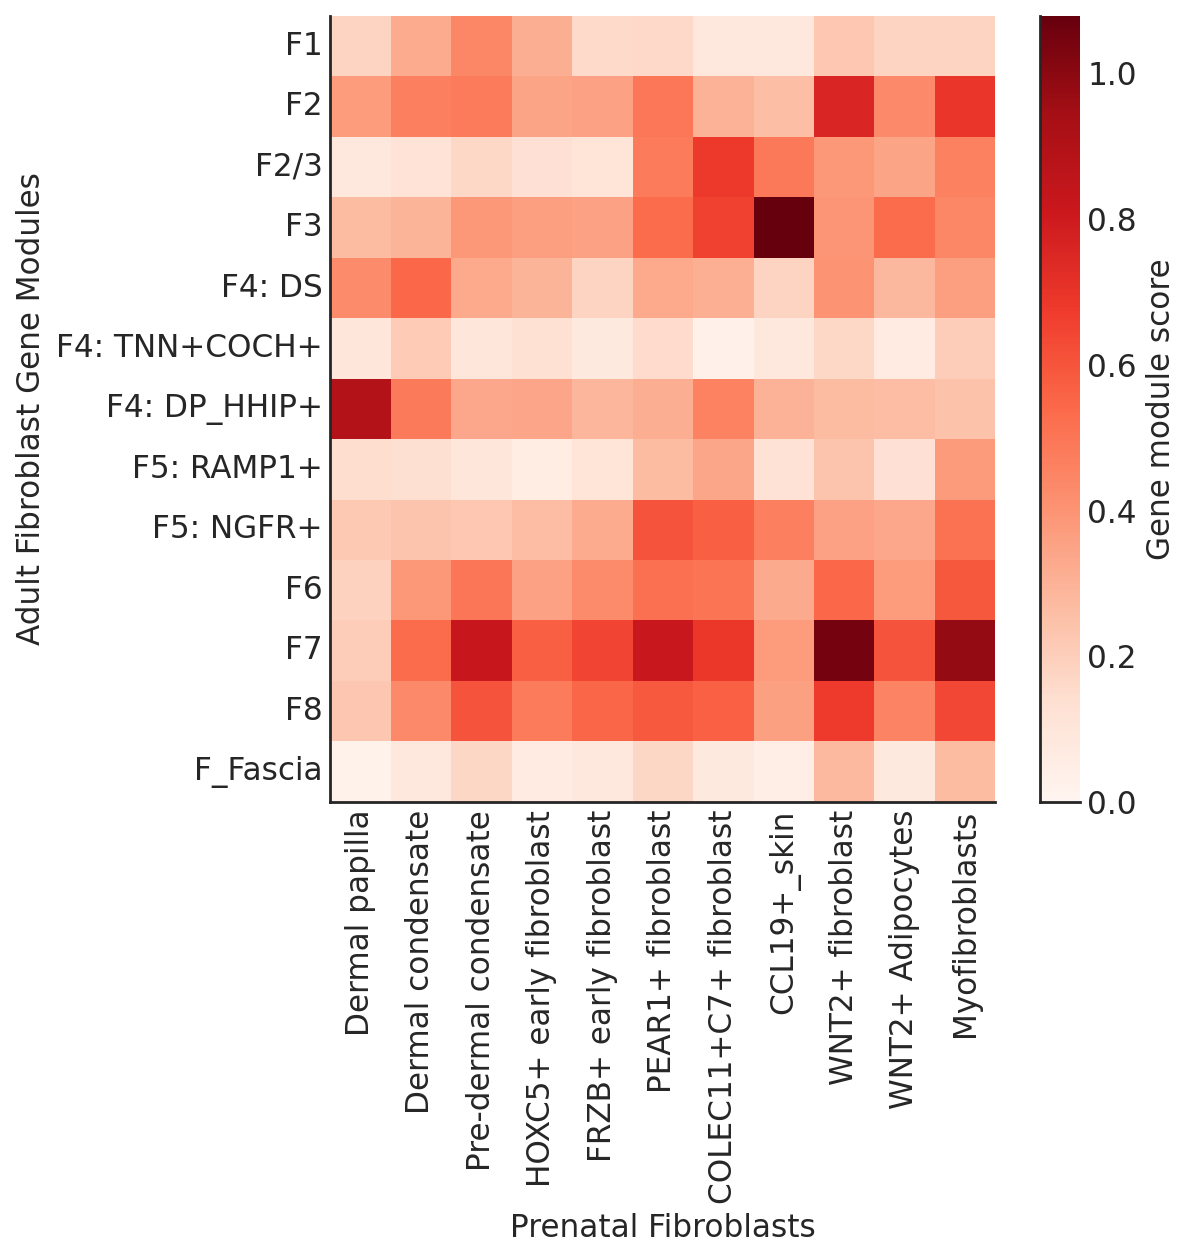

50


In [201]:
cluster_scores = adata_fetal.obs.groupby('test13')[['F1', "F2", "F2/3", "F3", "F4: DS",
                                                 "F4: TNN+COCH+", "F4: DP_HHIP+", "F5: RAMP1+",
                                                 "F5: NGFR+", "F6", "F7", "F8", "F_Fascia"]].mean()

plot_matrix(cluster_scores, 
            cmap="Reds", 
            normalisation=None, 
            colorbar_ticks= [0, 0.5, 1], 
            dataset_name= "Prenatal Fibroblasts",
            reorder_dict=None, 
            reorder_list = fetal_fb_order,
            savepath=f"fig8/8b_genemodule_fetal_{N}.pdf"
           )
print(N)

In [202]:
CONTROL_SIZE = 200 #default 50 (100 was good)
N_BINS=25 #default 25 (10 was good)
N = 1000

adata_fetal = sc.tl.score_genes(adata_fetal, df2["F1: Superficial"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F1")

In [203]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F2: Universal"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F2")
gc.collect()

10172

In [204]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F2/3: Stroma_PPARG+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F2/3")
gc.collect()

497

In [205]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F3: FRC-like"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F3")
gc.collect()

497

In [206]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: DS_DPEP1+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: DS")
gc.collect()

497

In [207]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: TNN+COCH+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: TNN+COCH+")
gc.collect()

497

In [208]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F4: DP_HHIP+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F4: DP_HHIP+")
gc.collect()

497

In [209]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F5: RAMP1+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F5: RAMP1+")
gc.collect()

497

In [210]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F5: NGFR+"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F5: NGFR+")
gc.collect()

497

In [211]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F6: Inflammatory myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F6")
gc.collect()

497

In [212]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F6: Myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F7")
gc.collect()

497

In [213]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F7: Fascia-like myofibroblast"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F8")
gc.collect()

497

In [214]:
adata_fetal = sc.tl.score_genes(adata_fetal, df2["F_Fascia"][:N], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="F_Fascia")

gc.collect()

497

In [215]:
sc.settings.figdir = "sfig10"

/tmp/ipykernel_17002/3877336463.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")  # Removes unnecessary background


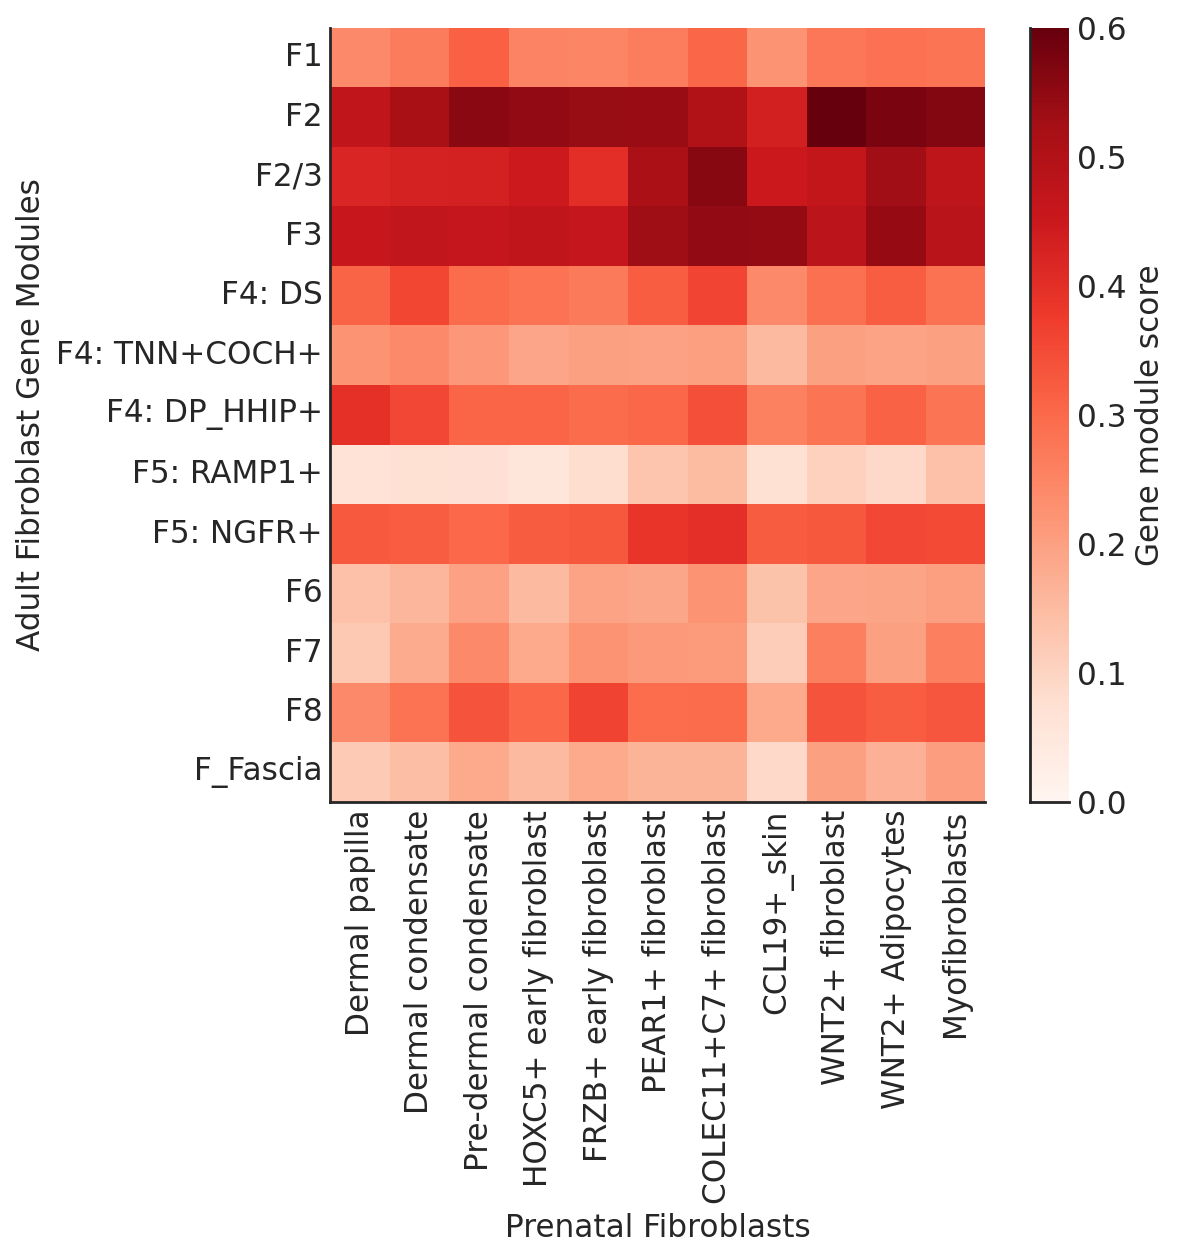

1000


In [216]:
cluster_scores = adata_fetal.obs.groupby('test13')[['F1', "F2", "F2/3", "F3", "F4: DS",
                                                 "F4: TNN+COCH+", "F4: DP_HHIP+", "F5: RAMP1+",
                                                 "F5: NGFR+", "F6", "F7", "F8", "F_Fascia"]].mean()
plot_matrix(cluster_scores, 
            cmap="Reds", 
            normalisation=None, 
            colorbar_ticks= [0, 0.5, 1], 
            dataset_name= "Prenatal Fibroblasts",
            reorder_dict=None, 
            reorder_list = fetal_fb_order,
            savepath=f"sfig10/sfig10d_genemodule_fetal_{N}.pdf"
           )
print(N)

In [217]:
# plot_matrix(cluster_scores, 
#             cmap="Reds", 
#             normalisation="minmax", 
#             colorbar_ticks= [0, 0.5, 1], 
#             dataset_name= "Prenatal Fibroblasts",
#             reorder_dict=None, 
#             reorder_list = fetal_fb_order
#            )